**DATA EXPLORATION**

Importing needed libraries for data exploration and analysis

In [1]:
import pandas as pd             # for creating dataframe, data manipulation and visualization
import matplotlib.pyplot as plt # for creating visualizations
import seaborn as sns           # for creating visualizations
import os                       # for changing file path/ directory
import warnings

warnings.filterwarnings('ignore')

In [2]:
#load the dataset

df = pd.read_csv(r"/content/Attrition Data.csv")

df.sample()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
902,27,No,Research & Development,4,2,Life Sciences,1,3,Divorced,2517,1,3,5


In [3]:
df.shape       #check the shape of the dataset

(1470, 13)

In [4]:
df.describe().transpose()    #using the 5 point summary to analyze the dataset

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.0,4.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
WorkLifeBalance,1470.0,2.761224,0.706476,1.0,2.0,3.0,3.0,4.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0


In [5]:
df.isnull().sum()           #check for null values

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

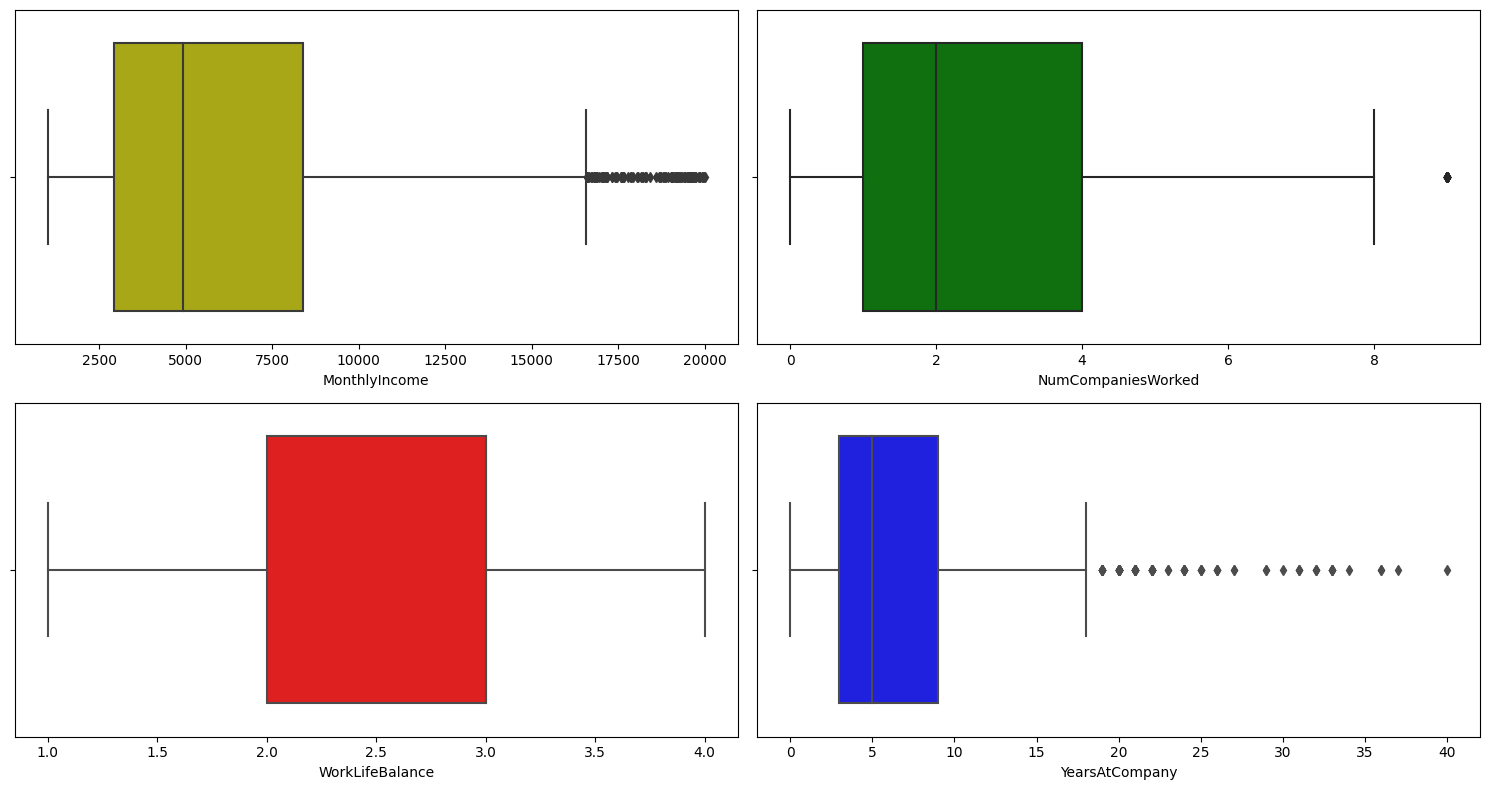

In [6]:
# Outlier Detection Using Boxplot

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols =2, figsize=(15, 8))

sns.boxplot(x=df['MonthlyIncome'], color='y', ax=axes[0,0])
sns.boxplot(x=df['NumCompaniesWorked'], color='g', ax=axes[0,1])
sns.boxplot(x=df['WorkLifeBalance'], color='r', ax=axes[1,0])
sns.boxplot(x=df['YearsAtCompany'], color='b', ax=axes[1,1])

plt.tight_layout()

plt.show()


In [7]:
#Outlier removal using quantiles


yac_min, yac_max = df['YearsAtCompany'].quantile([0.05,0.95])
ncw_min, ncw_max = df['NumCompaniesWorked'].quantile([0.05,0.95])
mie_min, mie_max = df['MonthlyIncome'].quantile([0.05,0.95])

df_a = df[(df['YearsAtCompany']>yac_min) & (df['YearsAtCompany']<yac_max)]
df_b = df[(df['NumCompaniesWorked']>ncw_min)&(df['NumCompaniesWorked']<ncw_max)]
df_c = df[(df['MonthlyIncome']>mie_min)&(df['MonthlyIncome']<mie_max)]

trimmed_data = df_c.copy()
trimmed_data.shape

(1322, 13)

In [8]:
trimmed_data.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,0.012015,0.201567,0.014619,0.011144,0.417735,0.281177,-0.029168,0.252131
DistanceFromHome,0.012015,1.000000,0.016369,-0.024774,0.000282,0.029488,-0.034292,-0.027029,0.029378
Education,0.201567,0.016369,1.000000,-0.038337,0.000436,0.099324,0.114609,0.018012,0.067003
EnvironmentSatisfaction,0.014619,-0.024774,-0.038337,1.000000,-0.013721,-0.005898,0.003237,0.027973,0.040393
JobSatisfaction,0.011144,0.000282,0.000436,-0.013721,1.000000,-0.006487,-0.050534,-0.029659,-0.000680
MonthlyIncome,0.417735,0.029488,0.099324,-0.005898,-0.006487,1.000000,0.128874,0.037304,0.462233
NumCompaniesWorked,0.281177,-0.034292,0.114609,0.003237,-0.050534,0.128874,1.000000,-0.005672,-0.134423
WorkLifeBalance,-0.029168,-0.027029,0.018012,0.027973,-0.029659,0.037304,-0.005672,1.000000,0.023865
YearsAtCompany,0.252131,0.029378,0.067003,0.040393,-0.000680,0.462233,-0.134423,0.023865,1.000000


DATA PREPROCESSING

i. Encoding categorical variables

In [9]:
#Encoding categorical variables since they cannot be used for data modelling in string format

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
trimmed_data['Attrition_n'] = le.fit_transform(trimmed_data['Attrition'])
trimmed_data['Department_n'] = le.fit_transform(trimmed_data['Department'])
trimmed_data['EducationField_n'] = le.fit_transform(trimmed_data['EducationField'])
trimmed_data['MaritalStatus_n'] = le.fit_transform(trimmed_data['MaritalStatus'])

encoded_data = trimmed_data.copy()
encoded_data.sample()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_n,Department_n,EducationField_n,MaritalStatus_n
829,33,Yes,Sales,9,4,Marketing,1,1,Single,8224,0,3,5,1,2,2,2


DATA PREPROCESSING

ii. Feature Selection

In [10]:
# Selecting the best ten independent features
# Decision Tree Classifier method will be used

from sklearn.tree import DecisionTreeClassifier

x = encoded_data.drop(['Attrition','Attrition_n', 'Department', 'EducationField','MaritalStatus'], axis = 1)     # independent variables
y = encoded_data.Attrition_n           # dependent/target variable

model = DecisionTreeClassifier()
model.fit(x,y)

model.feature_importances_
select_data = pd.Series(model.feature_importances_, index = x.columns)

select_data.nlargest(10)


Age                        0.154827
MonthlyIncome              0.152371
DistanceFromHome           0.123777
YearsAtCompany             0.105227
EducationField_n           0.081798
NumCompaniesWorked         0.070323
EnvironmentSatisfaction    0.067463
JobSatisfaction            0.062764
Education                  0.062352
WorkLifeBalance            0.047170
dtype: float64

In [11]:
best_columns = [select_data.nlargest(10).index]       # put the best columns in list datatype
best_columns

[Index(['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
        'EducationField_n', 'NumCompaniesWorked', 'EnvironmentSatisfaction',
        'JobSatisfaction', 'Education', 'WorkLifeBalance'],
       dtype='object')]

In [12]:
 # show the dependent variable (y)  and the independent variables (x)

x =encoded_data[['MonthlyIncome', 'Age', 'DistanceFromHome', 'NumCompaniesWorked',
        'EducationField_n', 'YearsAtCompany', 'JobSatisfaction',
        'EnvironmentSatisfaction', 'Education', 'MaritalStatus_n']]
y = encoded_data.Attrition_n
y.shape

(1322,)

DATA PREPROCESSING

iii. Feature Scaling

In [13]:
# feature scaling the x_train dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# splitting data set into train and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 0)


x_train.shape

(925, 10)

DATA MODELLING

In [14]:
# Training the dataset using Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rcf = RandomForestClassifier(n_estimators=40)
rcf.fit(x_train, y_train)

y_predict = rcf.predict(x_test)
rcf_score = rcf.score(x_test, y_predict)
print(f'An accuracy score of {rcf_score} will be observed if Random Forest algorithm is used')

An accuracy score of 1.0 will be observed if Random Forest algorithm is used


[[333   9]
 [ 48   7]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       342
           1       0.44      0.13      0.20        55

    accuracy                           0.86       397
   macro avg       0.66      0.55      0.56       397
weighted avg       0.81      0.86      0.82       397



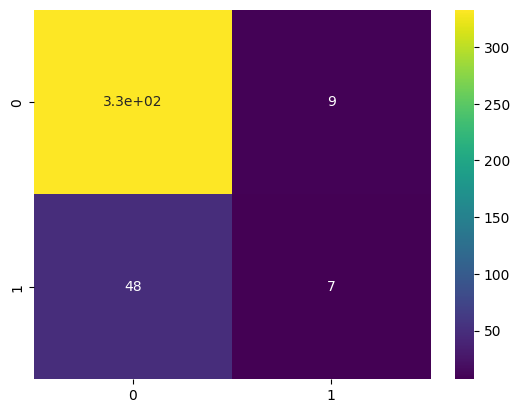

In [15]:
# Evaluating Random Forest Model using  confusion matrix to check accuracy score

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True, cmap='viridis')

print(classification_report(y_test,y_predict))